In [ ]:
# rule based learning 

students = ['tola','wale','ade']

name = input('Enter your name: ')
if name not in students:
    print(f'Your are not a student')
else:
    print(f'Welcome {name}')

Your are not a student


### Linear Regression Algorithm

In [29]:
# import the needed libraries 
import pandas as pd
import numpy as np

# libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_style('dark')
sns.set_palette('husl')

# libraries for ml and data modelling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

# load the sample dataset
from sklearn.datasets import load_diabetes

In [10]:
# load the dataset
X = load_diabetes(as_frame=True)['data']
y = load_diabetes()['target']

X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [32]:
y[:5]

array([151.,  75., 141., 206., 135.])

<Axes: >

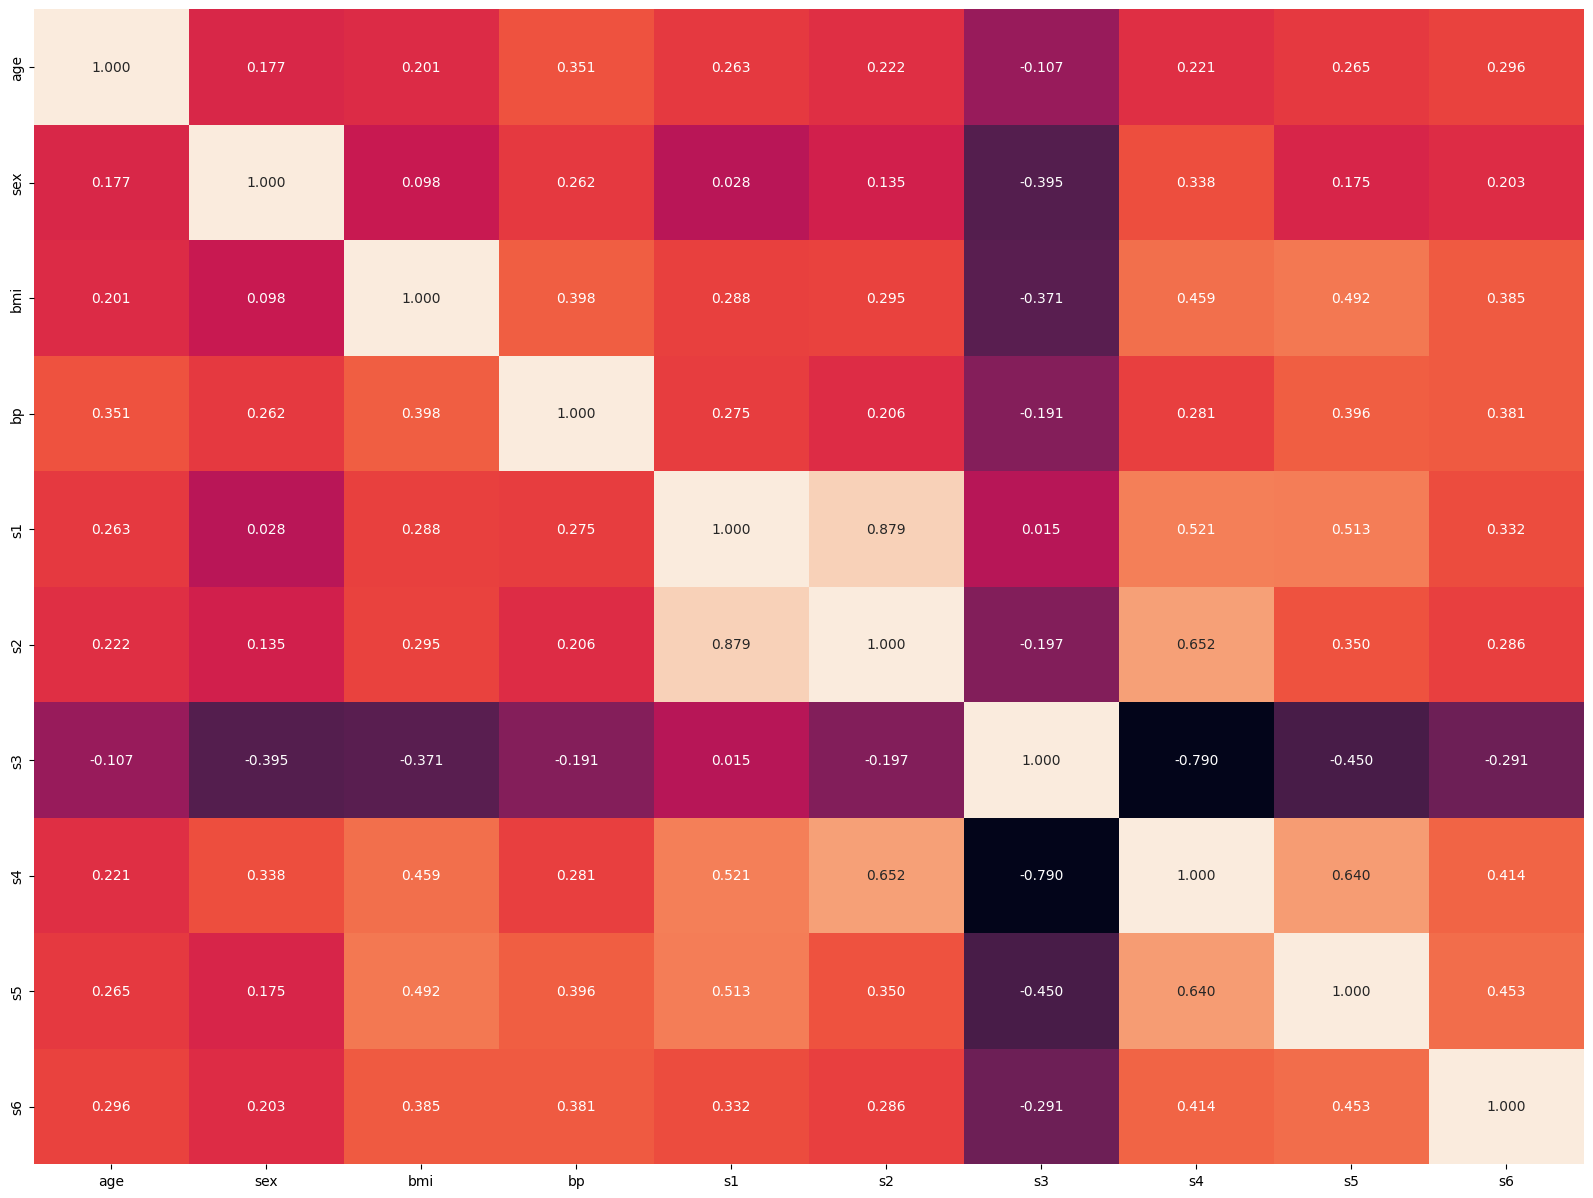

In [18]:
# correlation check

data_corr = X.corr(method='spearman')
plt.figure(figsize=(20,15))
sns.heatmap(data=data_corr, annot=True,fmt='0.03f', cbar = False)

<Axes: xlabel='age', ylabel='bmi'>

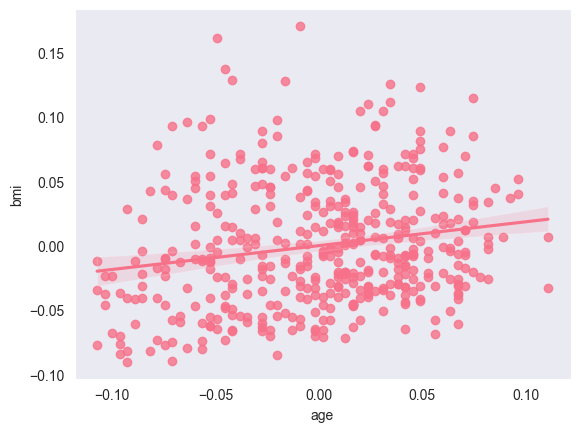

In [21]:
sns.regplot(data=X, x = 'age', y = 'bmi')

### Train the Regression the Model

In [22]:
# split the dataset

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                    random_state=23)
for i in [X_train, X_test, y_train, y_test]:
    print(f'{i.shape}')

(353, 10)
(89, 10)
(353,)
(89,)


In [24]:
# initialize the model
model = LinearRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# get prediction for the test set
test_preds = model.predict(X_test)

### Model Evaluation

In [26]:
# manually evaluate model performance
print(f'prediction: {test_preds[:5]}')
print(f'Actual: {y_test[:5]}')

prediction: [290.8985031  132.81832981 140.44601181  30.52576133 200.92486072]
Actual: [258. 103. 116. 104. 221.]


In [27]:
# compute the rmse for the test prediction
test_rmse = root_mean_squared_error(y_true=y_test, 
                                    y_pred=test_preds)
print(f'test_rmse: {test_rmse}')

test_rmse: 56.316841346469786


In [31]:
# compute coefficient of determination

coeff_score = r2_score(y_true=y_test, y_pred=test_preds)
print(f'coefficient of determination: {round(coeff_score, 4)}')

coefficient of determination: 0.4588


## assignment

Write a a short medium article on Linear regression with focus on:
1. model assumptions
2. model Evaluation
3. Pros and Cons

### LINEAR REGRESSION (OCTOBER)

In [2]:
# import the libraries

# data wrangling
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# customize the visual
sns.set_style('darkgrid')
sns.set_palette('husl')

# data modelling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score

In [3]:
# import dataset
data = px.data.tips()
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### STEP 1: EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [6]:
# check for missing values

data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

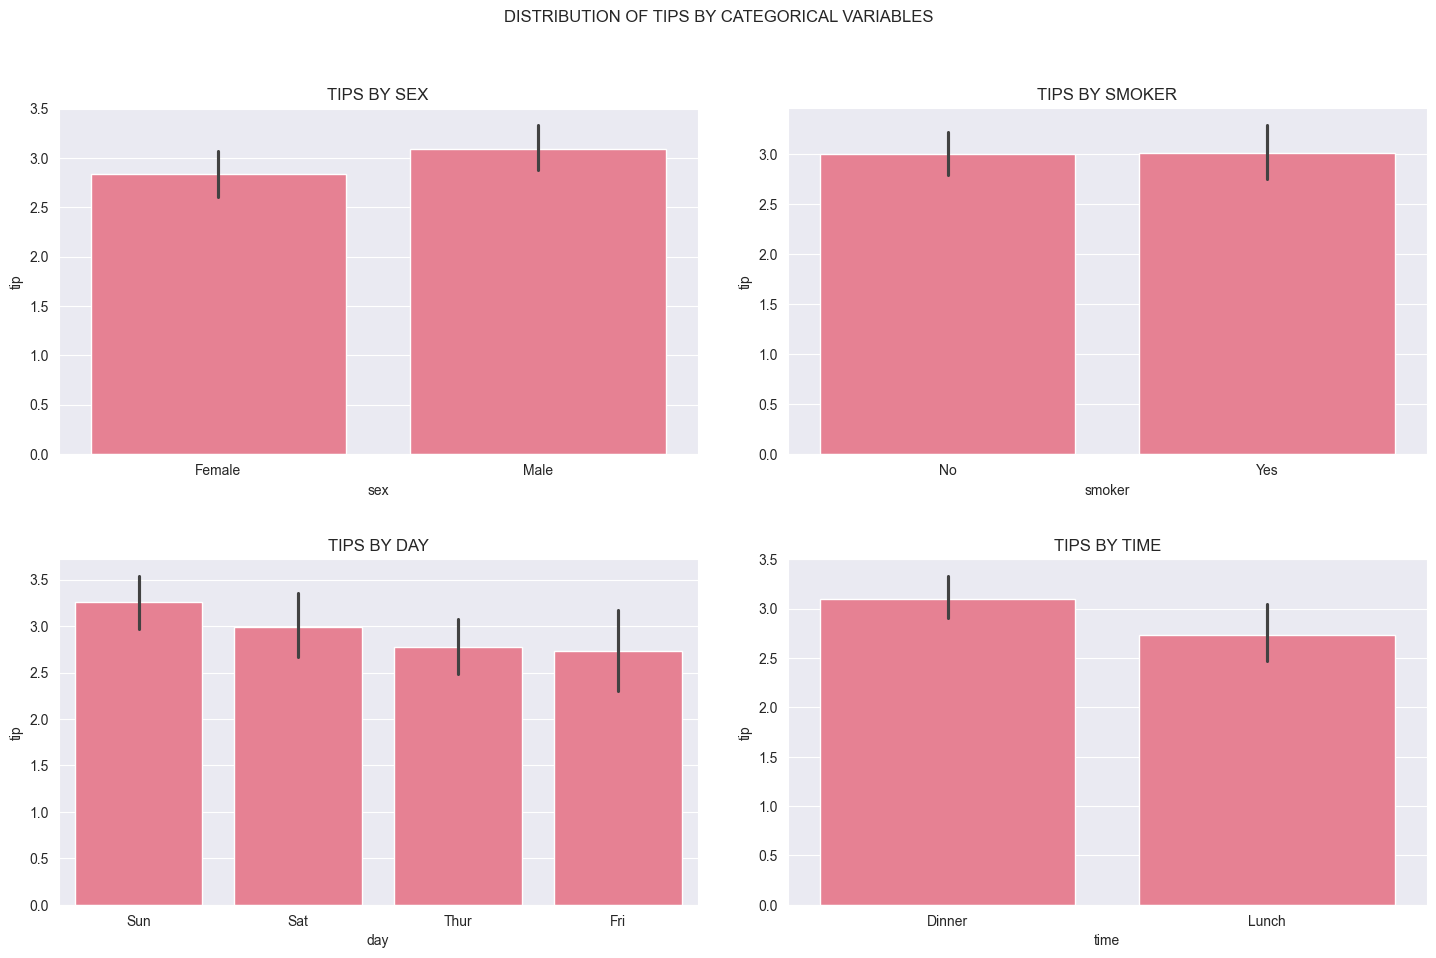

In [16]:
fig, axes = plt.subplots(2,2, figsize = (15,10))
sns.barplot(data=data, x = 'sex', y = 'tip', ax = axes[0,0])
sns.barplot(data=data, x = 'smoker', y = 'tip', ax = axes[0,1])
sns.barplot(data=data, x = 'day', y = 'tip', ax = axes[1,0])
sns.barplot(data=data, x = 'time', y = 'tip', ax = axes[1,1])

axes[0,0].set_title('TIPS BY SEX')
axes[0,1].set_title('TIPS BY SMOKER')
axes[1,0].set_title('TIPS BY DAY')
axes[1,1].set_title('TIPS BY TIME')

plt.suptitle('DISTRIBUTION OF TIPS BY CATEGORICAL VARIABLES')

plt.tight_layout(pad = 3)

<Axes: xlabel='size', ylabel='tip'>

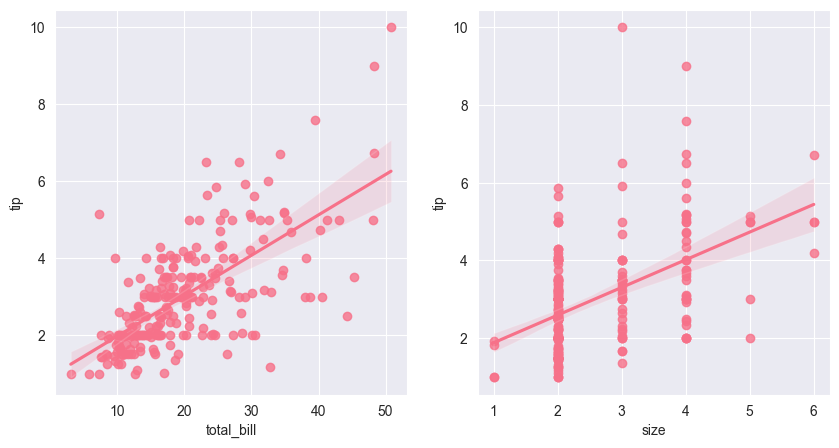

In [22]:
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.regplot(data=data, x = 'total_bill', y = 'tip', ax = axes[0])
sns.regplot(data=data, x = 'size', y = 'tip', ax = axes[1])


In [23]:
data[['total_bill','tip']].corr(method='spearman')

,total_bill,tip
total_bill,1.000000,0.678968
tip,0.678968,1.000000


In [ ]:
# encode the categorical variables.

categorical_variables = ['sex', 'smoker', 'day', 'time']

# init the encoder 
encoder = LabelEncoder()

for column_name in categorical_variables:
    data[column_name] = encoder.fit_transform(data[column_name])

In [38]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [71]:
# split the dataset into X and y

X = data.drop(columns=['tip','smoker'])
y = data['tip']

In [72]:
# split our dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=23)

In [73]:
# scale the train set

# init the scaler 
scaler = StandardScaler()
def scaler_func(data):
    columns = data.columns
    data = scaler.fit_transform(data)
    data = pd.DataFrame(data= data, columns= columns)
    data.head()
    
    return data

X_train = scaler_func(X_train)

In [74]:
# build the model 

# init the model
model = LinearRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)


# get predictions on the test set
# scale the test set
X_test = scaler_func(data = X_test)
test_preds = model.predict(X_test)

### Model Evaluation

In [75]:
train_rmse = root_mean_squared_error(y_true=y_train, y_pred=train_preds)
test_rmse = root_mean_squared_error(y_true=y_test, y_pred=test_preds)

print(f'Train rmse: {train_rmse}')
print(f'Test rmse: {test_rmse}')

Train rmse: 1.0334259450639518
Test rmse: 0.8613949368341464


In [59]:
data.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3


In [63]:
## Dummy model deployment for inference.

def predict():
    total_bill = float(input('Total bill: '))
    sex = float(input('sex: '))
    smoker = float(input('smoker: '))
    day = float(input('day: '))
    time = float(input('time: '))
    size = float(input('size: '))
    
    pred_data = pd.DataFrame(data= [[total_bill,sex,smoker,day,time,size]],
                             columns=['total_bill','sex','smoker','day','time','size'])
    pred_data = scaler.transform(pred_data)
    pred_data = pd.DataFrame(data = pred_data, columns=['total_bill','sex','smoker','day','time','size'])
    pred = model.predict(pred_data)
    
    return f'This user is expected to tip {pred[0]}'

In [64]:
predict()

'This user is expected to tip 17.304171633687616'

In [65]:
test_preds

array([2.0133236 , 4.08102472, 1.56183295, 2.40117596, 4.67550565,
       2.32051743, 2.19997807, 4.11243565, 4.90817921, 2.04053195,
       3.31991508, 5.86158593, 2.12023439, 2.11401736, 2.56870092,
       3.45407151, 2.23559158, 3.19656581, 3.44846494, 3.12091446,
       2.61910276, 1.03322221, 4.78045727, 2.12434214, 3.0351306 ,
       2.90801815, 2.88403833, 3.20216642, 2.76924807, 3.4158259 ,
       2.28256016, 3.41544888, 3.75978968, 2.57898745, 2.68581491,
       2.99204775, 3.09668611, 4.45640635, 2.52003272, 3.77185469,
       2.11078191, 4.06143125, 2.5086214 , 2.49832891, 3.0924744 ,
       2.33160539, 3.98923771, 2.97245428, 2.70875295])

In [76]:
(test_rmse/y_test.mean()) * 100

29.898952967962867